In [2]:
#set NK parameters and points for the x and y grid of the heatmap
import numpy as np
import canonical_nk as nk

In [3]:
params_d = {'beta': 0.99, 'gamma_pi': 2.0, 'gamma_y': 0.0, 'kappa': 0.05, 'dpbar': 1.005}
params = np.array(list(params_d.values()))

Nrow = 100
Ncol = 100
ns = 51
eta = np.zeros(ns)

mapswitch = 0
if (mapswitch == 0):
    pvec = np.linspace(0.9,0.995,num=Ncol)
    eta_psi = np.linspace(0.005,0.025,num=Nrow)
    rhoeta = 2*pvec-1
    stdeta = eta_psi/np.sqrt(ns-1)
else:
    rhoeta = np.linspace(0.85,0.99,num=Ncol)
    stdinnov = np.linspace(0.00025,0.0003,num=Nrow)

In [4]:
#generate data for heatmap
sol = np.zeros([Nrow,Ncol],dtype=int)
for i in np.arange(Ncol):
    for j in np.arange(Nrow):
        if (mapswitch != 0):
            stdeta = np.sqrt(stdinnov[j]**2/(1-rhoeta[i]**2))
            psi = stdeta*np.sqrt(ns-1)
            p = (1+rhoeta[i])/2
        else:
            psi = eta_psi[j]
            p = pvec[i]
        eta = np.linspace(-psi,psi,num=ns)
        P = nk.transmat(ns,p,p)
        (sol[j,i],yy,dp,notr,nomr) = nk.solve_model(eta,P,params,ns)

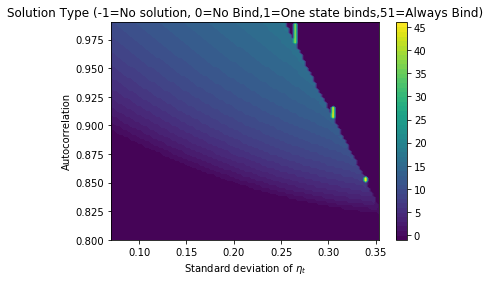

In [5]:
import matplotlib.pyplot as plt
if (mapswitch == 0):
    plt.contourf(100.0*stdeta, rhoeta, sol,50)
    plt.xlabel('Standard deviation of $\eta_t$')
else:
    plt.contourf(100.0*stdinnov,rhoeta,sol,50)
    plt.xlabel('Standard deviation of innovation of $\eta_t$')
plt.colorbar()
plt.ylabel('Autocorrelation')
plt.title('Solution Type (-1=No solution, 0=No Bind,1=One state binds,'\
          + str(ns)+'=Always Bind)')
plt.show()

In [6]:
#Get solution at point where model solves
rho = 0.95
p = (1+rho)/2
stdeta = 0.22/100
eta_max = np.sqrt(ns-1)*stdeta
eta = np.linspace(-eta_max,eta_max,num=ns)
P = nk.transmat(ns,p,p)
(solution_type,yy,dp,notr,nomr) = nk.solve_model(eta,P,params,ns)
(yyu,dpu,notru,nomru) = nk.solve_case(eta,P,params,ns,0)
solution_type

13

/msu/home/m1gsa00/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


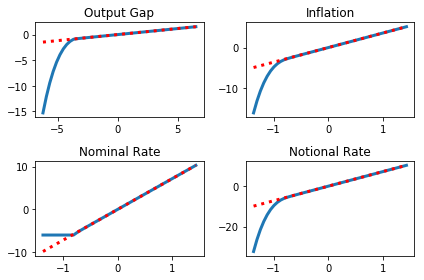

In [7]:
#Plot IRFs of linear and nonlinear model
start = 3
end = ns+1-3
fig2, axs2 = plt.subplots(2, 2, tight_layout=True)
axs2[0,0].plot(eta[start:end]/stdeta,100*yy[start:end],linewidth=3,label='Constrained') 
axs2[0,0].plot(eta[start:end]/stdeta,100*yyu[start:end],'r:',linewidth=3,\
               label='Unconstrained') 
axs2[0,0].set_title('Output Gap')
axs2[0,1].plot(100*eta[start:end],400*dp[start:end],linewidth=3,label='Constrained')
axs2[0,1].plot(100*eta[start:end],400*dpu[start:end],'r:',linewidth=3,\
               label='Unconstrained')
axs2[0,1].set_title('Inflation')
axs2[1,0].plot(100*eta[start:end],400*nomr[start:end],linewidth=3,label='Constrained')
axs2[1,0].plot(100*eta[start:end],400*notru[start:end],'r:',linewidth=3,\
               label='Unconstrained')
axs2[1,0].set_title('Nominal Rate')
axs2[1,1].plot(100*eta[start:end],400*notr[start:end],linewidth=3,label='Constrained') 
axs2[1,1].plot(100*eta[start:end],400*notru[start:end],'r:',linewidth=3,\
               label='Unconstrained') 
axs2[1,1].set_title('Notional Rate')
plt.show()

In [8]:
100*eta.round(6)

array([-1.5556, -1.4934, -1.4312, -1.369 , -1.3067, -1.2445, -1.1823,
       -1.1201, -1.0578, -0.9956, -0.9334, -0.8712, -0.8089, -0.7467,
       -0.6845, -0.6223, -0.56  , -0.4978, -0.4356, -0.3734, -0.3111,
       -0.2489, -0.1867, -0.1245, -0.0622,  0.    ,  0.0622,  0.1245,
        0.1867,  0.2489,  0.3111,  0.3734,  0.4356,  0.4978,  0.56  ,
        0.6223,  0.6845,  0.7467,  0.8089,  0.8712,  0.9334,  0.9956,
        1.0578,  1.1201,  1.1823,  1.2445,  1.3067,  1.369 ,  1.4312,
        1.4934,  1.5556])